In [ ]:
# Required libraries
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np

## Parser

In [ ]:
def get_song_links(genre):
    song_links = []
    url = f'https://www.metrolyrics.com/top100-{genre}.html'
    response = requests.get(url)
    response.encoding ='utf8'
    page = BeautifulSoup(response.text, 'html.parser')
    links_20 = page.find_all('a', class_='song-link')
    links_80 = page.find_all('a', class_='title')
    for link in links_20:
        song_links.append(link.get("href"))
    for link in links_80:
        song_links.append(link.get("href"))
    return song_links

In [ ]:
genres = ['pop','rock','hip-hop','metal','elecrtonic','r&b','country']
links = []
for genre in genres:
    links.append(get_song_links(genre))


In [ ]:
f_links = []
for i in links:
    for j in i:
        f_links.append(j)

In [ ]:
def get_lyrics_and_metadata(url):
    data = {}
    response = requests.get(url)
    response.encoding ='utf8'
    page = BeautifulSoup(response.text, 'html.parser')
    data['artist'], data['title'] = page.find('h1').text.split('-')[0], page.find('h1').text.split('-')[1]
    text_raw = page.find_all('p', class_ = 'verse')
    text = ''
    for row in text_raw:
        text += row.text.replace('\n', ' ')
    data['text'] = text
    return data

In [ ]:
data = []
for url in f_links:
    data.append(get_lyrics_and_metadata(url))


In [ ]:
df = pd.DataFrame(data)
df

,artist,title,text
0,Westlife,Beautiful In White Lyrics,Not sure if you know this But when we first me...
1,Luis Fonsi,Despacito Lyrics,[Luis Fonsi & Daddy Yankee:] ¡Ay! ¡Fonsi! ¡D.Y...
2,Zayn Malik,Too Much Lyrics,[Verse 1: ZAYN] Looking right and the time fli...
3,The Carpenters,Close To You Lyrics,"Why do birds suddenly appear, ev'ry time you a..."
4,Christina Perri,A Thousand Years Lyrics,Heart beats fast Colors and promises How to be...
...,...,...,...
640,Dolly Parton,9 To 5 Lyrics,Tumble outta bed And I stumble to the kitchen ...
641,Eric Church,Desperate Man Lyrics,I've seen the Joshua Tree Got down on my knees...
642,Rascal Flatts,Life Is A Highway Lyrics,Life's like a road that you travel on When the...
643,Ray Stevens,Everything Is Beautiful Lyrics,Jesus loves the little children All the childr...


In [ ]:
df.title = df.title.apply(lambda x: x[:-7])

In [ ]:
df

,artist,title,text
0,Westlife,Beautiful In White,Not sure if you know this But when we first me...
1,Luis Fonsi,Despacito,[Luis Fonsi & Daddy Yankee:] ¡Ay! ¡Fonsi! ¡D.Y...
2,Zayn Malik,Too Much,[Verse 1: ZAYN] Looking right and the time fli...
3,The Carpenters,Close To You,"Why do birds suddenly appear, ev'ry time you a..."
4,Christina Perri,A Thousand Years,Heart beats fast Colors and promises How to be...
...,...,...,...
640,Dolly Parton,9 To 5,Tumble outta bed And I stumble to the kitchen ...
641,Eric Church,Desperate Man,I've seen the Joshua Tree Got down on my knees...
642,Rascal Flatts,Life Is A Highway,Life's like a road that you travel on When the...
643,Ray Stevens,Everything Is Beautiful,Jesus loves the little children All the childr...


In [ ]:
 df.to_csv('df.csv')
df = pd.read_csv('df.csv')
df.drop('Unnamed: 0', axis = 1, inplace= True)
df.head()

,artist,title,text
0,Westlife,Beautiful In White,Not sure if you know this But when we first me...
1,Luis Fonsi,Despacito,[Luis Fonsi & Daddy Yankee:] ¡Ay! ¡Fonsi! ¡D.Y...
2,Zayn Malik,Too Much,[Verse 1: ZAYN] Looking right and the time fli...
3,The Carpenters,Close To You,"Why do birds suddenly appear, ev'ry time you a..."
4,Christina Perri,A Thousand Years,Heart beats fast Colors and promises How to be...


In [ ]:
# data cleaning
def delete_comm(string):
    str = string
    while str.find("[") != -1:
        try:
            firstDelPos=str.find("[") # get the position of [
            secondDelPos=str.find("]") # get the position of ]
            str = str.replace(str[firstDelPos:secondDelPos+1], "")
        except:
                pass
    return str.strip()

In [ ]:
df.text = df.text.apply(delete_comm)

In [ ]:
df

,artist,title,text
0,Westlife,Beautiful In White,Not sure if you know this But when we first me...
1,Luis Fonsi,Despacito,"¡Ay! ¡Fonsi! ¡D.Y.!Ohhh Oh, no, oh, no Oh Hey,..."
2,Zayn Malik,Too Much,Looking right and the time flied I took a day ...
3,The Carpenters,Close To You,"Why do birds suddenly appear, ev'ry time you a..."
4,Christina Perri,A Thousand Years,Heart beats fast Colors and promises How to be...
...,...,...,...
640,Dolly Parton,9 To 5,Tumble outta bed And I stumble to the kitchen ...
641,Eric Church,Desperate Man,I've seen the Joshua Tree Got down on my knees...
642,Rascal Flatts,Life Is A Highway,Life's like a road that you travel on When the...
643,Ray Stevens,Everything Is Beautiful,Jesus loves the little children All the childr...


## Visualization

In [ ]:
# Required libraries
import matplotlib.pyplot as plt

In [ ]:
df.title.value_counts()

 Shape of You                 3
 Girls Like You               3
 Heaven's Not Too Far Away    3
 New York                     3
 Sila                         3
                             ..
 Do I Ever Cross Your Mind    1
 Bring Me Sunshine            1
 When A Man Loves A Woman     1
 Jambalaya                    1
 The Story                    1
Name: title, Length: 491, dtype: int64

In [ ]:
df[df.title == ' Aadat']

,artist,title,text
159,Atif Aslam,Aadat,Juda ho ke bhi Tu mujhmein kahin baki hai Palk...
301,Ninja,Aadat,Tu waada kita si ki Jind teri khushiya naal bh...


In [ ]:
df = df.drop_duplicates()

In [ ]:
df

,artist,title,text
0,Westlife,Beautiful In White,Not sure if you know this But when we first me...
1,Luis Fonsi,Despacito,"¡Ay! ¡Fonsi! ¡D.Y.!Ohhh Oh, no, oh, no Oh Hey,..."
2,Zayn Malik,Too Much,Looking right and the time flied I took a day ...
3,The Carpenters,Close To You,"Why do birds suddenly appear, ev'ry time you a..."
4,Christina Perri,A Thousand Years,Heart beats fast Colors and promises How to be...
...,...,...,...
640,Dolly Parton,9 To 5,Tumble outta bed And I stumble to the kitchen ...
641,Eric Church,Desperate Man,I've seen the Joshua Tree Got down on my knees...
642,Rascal Flatts,Life Is A Highway,Life's like a road that you travel on When the...
643,Ray Stevens,Everything Is Beautiful,Jesus loves the little children All the childr...


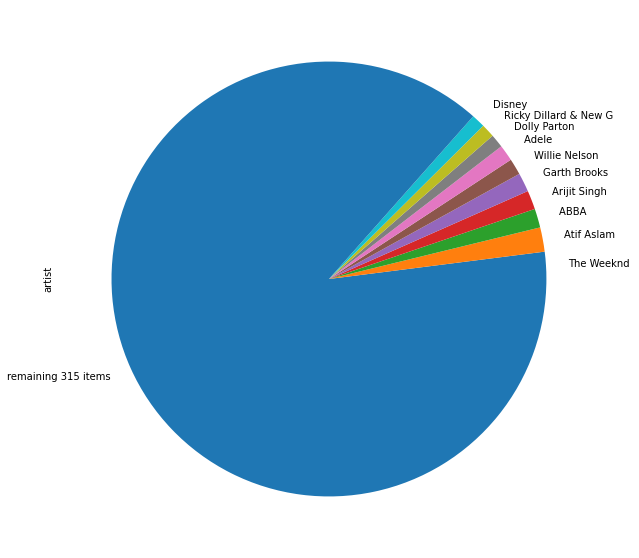

In [ ]:
temp = df.artist.value_counts()
temp2 = temp.head(10)
if len(temp) > 10:
    temp2['remaining {0} items'.format(len(temp) - 10)] = sum(temp[10:])
temp2.plot(kind='pie',figsize=(20, 10))

In [ ]:
df['num_of_words'] = df.text.apply(lambda x: len(x.split(' ')))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


we need to make some songs favorites

In [ ]:
def liked(x,mean):
    if x>mean:
        return 0
    else:
        return 1

In [ ]:
df['liked'] = df.num_of_words.apply(lambda x: liked(x,df.num_of_words.mean()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,artist,title,text,num_of_words,liked
0,Westlife,Beautiful In White,Not sure if you know this But when we first me...,253,0
1,Luis Fonsi,Despacito,"¡Ay! ¡Fonsi! ¡D.Y.!Ohhh Oh, no, oh, no Oh Hey,...",451,0
2,Zayn Malik,Too Much,Looking right and the time flied I took a day ...,414,0
3,The Carpenters,Close To You,"Why do birds suddenly appear, ev'ry time you a...",167,1
4,Christina Perri,A Thousand Years,Heart beats fast Colors and promises How to be...,215,1
...,...,...,...,...,...
640,Dolly Parton,9 To 5,Tumble outta bed And I stumble to the kitchen ...,351,0
641,Eric Church,Desperate Man,I've seen the Joshua Tree Got down on my knees...,228,1
642,Rascal Flatts,Life Is A Highway,Life's like a road that you travel on When the...,417,0
643,Ray Stevens,Everything Is Beautiful,Jesus loves the little children All the childr...,267,0


In [ ]:
df['num_of_words'].describe()

count    498.000000
mean     245.500000
std      124.864438
min        1.000000
25%      159.000000
50%      228.000000
75%      313.750000
max      770.000000
Name: num_of_words, dtype: float64

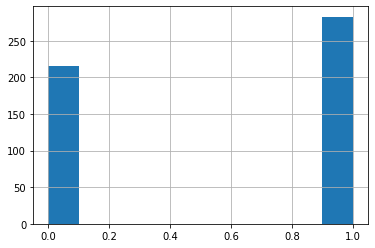

In [ ]:
df.liked.hist()

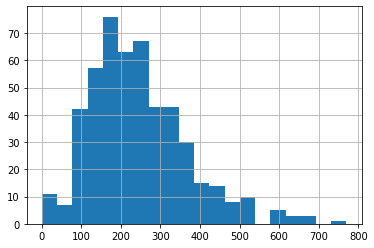

In [ ]:
df.num_of_words.hist(bins=20)

In [ ]:
# top 10 artist for this user
df[df.liked == 1].artist.value_counts()[:10]

Atif Aslam                7
Arijit Singh              5
Ricky Dillard & New G     5
Willie Nelson             4
Peterpan                  4
Disney                    4
Dolly Parton              4
ABBA                      3
Garth Brooks              3
The Beatles               3
Name: artist, dtype: int64

In [ ]:
df.title = df.title.astype('string')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## ML

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X, y = df.drop('liked',axis=1), df.liked

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42, shuffle = True)

In [ ]:
X_test

,artist,title,text,num_of_words
634,Roger Miller,King Of The Road,"Trailer for sale or rent, rooms to let, fifty ...",169
73,Céline Dion,My Heart Will Go On,"Every night in my dreams I see you, I feel you...",168
250,Charles Goose,Yodeling Walmart Kid,"I got a feelin' called the blues, oh, Lord Sin...",266
175,Ungu,Laguku,Mungkinkah kau tau Rasa cinta yang kini membar...,124
265,National Anthem Orchestra,Jana Gana Mana,Stanza 1 (National Anthem of India) Jana Gana ...,603
...,...,...,...,...
193,The Beatles,In My Life,There are places I remember All my life though...,143
5,Grease,Summer Nights,Summer lovin' had me a blast Summer lovin' hap...,314
116,Peterpan,Menghapus Jejakmu,Terus melangkah melupakanmu Lelah hati perhati...,128
45,Mariah Carey,We Belong Together,I didn't mean it when I said I didn't love you...,409


In [ ]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english')
tfidf_train=tfidf_vectorizer.fit_transform(X_train.text) 
tfidf_test=tfidf_vectorizer.transform(X_test.text)

In [ ]:
tfidf_train

<348x9370 sparse matrix of type '<class 'numpy.float64'>'
	with 21911 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_test

<150x9370 sparse matrix of type '<class 'numpy.float64'>'
	with 6316 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(tfidf_train.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9330,9331,9332,9333,9334,9335,9336,9337,9338,9339,9340,9341,9342,9343,9344,9345,9346,9347,9348,9349,9350,9351,9352,9353,9354,9355,9356,9357,9358,9359,9360,9361,9362,9363,9364,9365,9366,9367,9368,9369
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 607 to 102
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   artist        348 non-null    object
 1   title         346 non-null    string
 2   text          348 non-null    object
 3   num_of_words  348 non-null    int64 
dtypes: int64(1), object(2), string(1)
memory usage: 13.6+ KB


In [ ]:
clf = RandomForestClassifier(n_estimators=200, max_depth = 11)
clf.fit(tfidf_train,y_train)
y_pred=clf.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')
print(confusion_matrix(y_test,y_pred))

Accuracy: 80.0%
[[42 24]
 [ 6 78]]


In [ ]:
X_test['predict'] = clf.predict(tfidf_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_test[X_test.predict == 1].title

634        King Of The Road
73      My Heart Will Go On
175                  Laguku
265          Jana Gana Mana
571         Whiskey Lullaby
               ...         
617           Remember When
259          La Vie En Rose
517                 Starboy
193              In My Life
116       Menghapus Jejakmu
Name: title, Length: 102, dtype: string

In [ ]:
X_test[X_test.predict == 1].title.to_csv('predict.csv',index=False )